In [67]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from numpy import inf
warnings.filterwarnings('ignore')

In [68]:
def solve_simple(X_0, F, eps):
    X_vec = X_0
    xk1 = X_0
    k = 1
    while(True):
        xk = F(xk1)
        if xk==float("inf"):
            print("Algorithm diverges")
            print()
            return X_vec
        X_vec = np.vstack((X_vec, xk))
        if abs(xk - xk1) < eps:
            print("Algorithm converges")
            print()
            return X_vec
        xk1 = xk
        k+=1

In [69]:
def solve_smooth(X_0, F, eps, l_coef):
    xk1 = X_0
    X_vec = X_0
    lk = 1
    k = 1
    while(True):
        lk = l_coef*lk
        xk = lk*xk1 + (1-lk)*F(xk1)
        if xk==float("inf"):
            print("Algorithm diverges")
            print()
            return X_vec
        X_vec = np.vstack((X_vec, xk))
        if abs(xk - xk1) < eps:
            print("Algorithm converges")
            print()
            return X_vec

        xk1 = xk
        k+=1

In [70]:
f = lambda t: np.exp((t-2)**2) - 2
epsilon = 1e-8
lambda_coef = 0.99
x0 = 0.95
x_vec1 = solve_simple(x0, f, epsilon)
x_vec2 = solve_smooth(x0, f, epsilon, lambda_coef)

Algorithm diverges

Algorithm converges



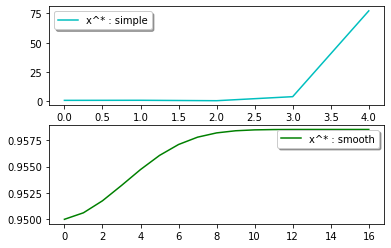

In [71]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(np.arange(len(x_vec1)), x_vec1, color='c', label="x^* : simple")
axs[1].plot(np.arange(len(x_vec2)), x_vec2, color='g', label="x^* : smooth")
axs[0].legend(shadow=True, fancybox=True)
axs[1].legend(shadow=True, fancybox=True)
plt.show()